# Clustering

### Part 1: Load data

In [1]:
# Load mtcars
import pandas as pd
mtcars = pd.read_csv('mtcars.csv', index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Part 2: Preprocess data

In [2]:
# Min-max scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mtcars_scaled = pd.DataFrame(mms.fit_transform(mtcars),
                            columns=mtcars.columns,
                            index=mtcars.index)
mtcars_scaled.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,0.451064,0.5,0.221751,0.204947,0.525346,0.283048,0.233333,0.0,1.0,0.5,0.428571
Mazda RX4 Wag,0.451064,0.5,0.221751,0.204947,0.525346,0.348249,0.300000,0.0,1.0,0.5,0.428571
Datsun 710,0.527660,0.0,0.092043,0.144876,0.502304,0.206341,0.489286,1.0,1.0,0.5,0.000000
Hornet 4 Drive,0.468085,0.5,0.466201,0.204947,0.147465,0.435183,0.588095,1.0,0.0,0.0,0.000000
Hornet Sportabout,0.353191,1.0,0.720629,0.434629,0.179724,0.492713,0.300000,0.0,0.0,0.0,0.142857


### Part 3: Modeling

In [3]:
#clustering
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=5)
cls.fit(mtcars_scaled)

KMeans(n_clusters=5)

In [4]:
centroid = pd.DataFrame(cls.cluster_centers_,
                        columns=mtcars.columns)

centroid

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.490426,0.375000,0.187640,0.245583,0.554147,0.278254,0.228571,0.0,1.0,0.750000,0.428571
1,0.197872,1.000000,0.714684,0.502356,0.166283,0.662512,0.314583,0.0,0.0,0.000000,0.297619
2,0.440122,0.285714,0.259452,0.177183,0.373272,0.429886,0.650850,1.0,0.0,0.285714,0.163265
3,0.764742,0.000000,0.046645,0.100959,0.639895,0.131753,0.500000,1.0,1.0,0.571429,0.061224
4,0.212766,1.000000,0.635819,0.874558,0.516129,0.474815,0.005952,0.0,1.0,1.000000,0.714286


<AxesSubplot:>

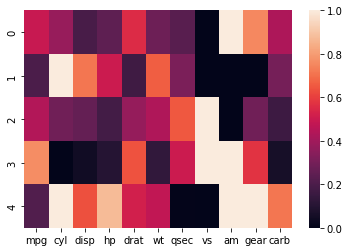

In [5]:
import seaborn as sns
sns.heatmap(centroid)

In [6]:
x = mtcars
x['cluster'] = cls.predict(mtcars_scaled)
x['cluster']

model
Mazda RX4              0
Mazda RX4 Wag          0
Datsun 710             3
Hornet 4 Drive         2
Hornet Sportabout      1
Valiant                2
Duster 360             1
Merc 240D              2
Merc 230               2
Merc 280               2
Merc 280C              2
Merc 450SE             1
Merc 450SL             1
Merc 450SLC            1
Cadillac Fleetwood     1
Lincoln Continental    1
Chrysler Imperial      1
Fiat 128               3
Honda Civic            3
Toyota Corolla         3
Toyota Corona          2
Dodge Challenger       1
AMC Javelin            1
Camaro Z28             1
Pontiac Firebird       1
Fiat X1-9              3
Porsche 914-2          0
Lotus Europa           3
Ford Pantera L         4
Ferrari Dino           0
Maserati Bora          4
Volvo 142E             3
Name: cluster, dtype: int32

In [7]:
# within cluster sum of square
cls.inertia_

5.218534677109267

### Hierachical Clustering

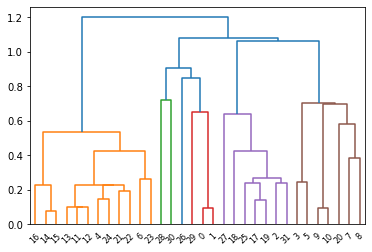

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(mtcars_scaled)
plt.figure()
dendrogram(Z)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(mtcars_scaled)
ac.labels_

array([1, 1, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0,
       0, 0, 0, 3, 1, 3, 4, 1, 4, 3], dtype=int64)

## Lab

#### Change Number of Cluster

In [24]:
from sklearn.cluster import KMeans
KCluster = 20
sseList = []
for k in range(1,KCluster+1):
    cls_lab = KMeans(n_clusters=k)
    cls_lab.fit(mtcars_scaled)
    sseList.append(cls_lab.inertia_)

C:\Users\babyt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
sseList

[39.68931836655544,
 20.07051458335183,
 12.24423766245619,
 6.949158331220929,
 5.218534677109267,
 4.3788981868889,
 3.5972153609963073,
 2.9490763876340798,
 2.426290218963684,
 2.0706825129272093,
 1.7212845264472425,
 1.4775632379759385,
 1.1281652514959712,
 0.8706722675744616,
 0.6370921616774567,
 0.5008116058830329,
 0.38573619391965136,
 0.3112474274100851,
 0.2431013483397323,
 0.19490412735287366]

In [26]:
y_axis = sseList
x_axis = list(range(1,KCluster+1))

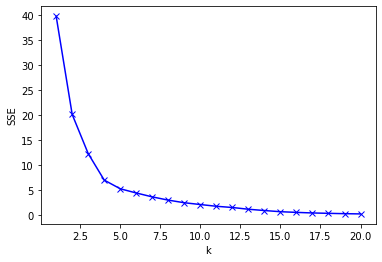

In [27]:
plt.plot(x_axis, y_axis, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()